In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


dataset link: https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [3]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Check the shape
df.shape

(10000, 14)

In [5]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Check null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# Check duplicates rows

df.duplicated().sum()

0

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de

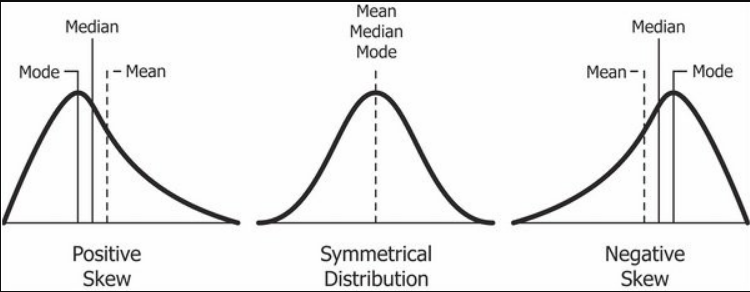

In [9]:
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [10]:
df.skew(axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


0       3.316373
1       3.316193
2       3.315777
3       3.316411
4       3.316145
          ...   
9995    3.316399
9996    3.316325
9997    3.316581
9998    3.316321
9999    3.316207
Length: 10000, dtype: float64

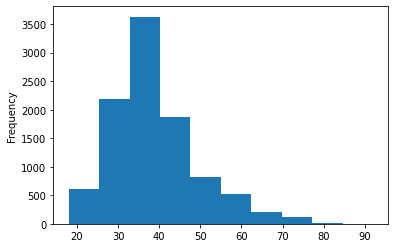

In [11]:
df['Age'].plot(kind='hist')
plt.show()

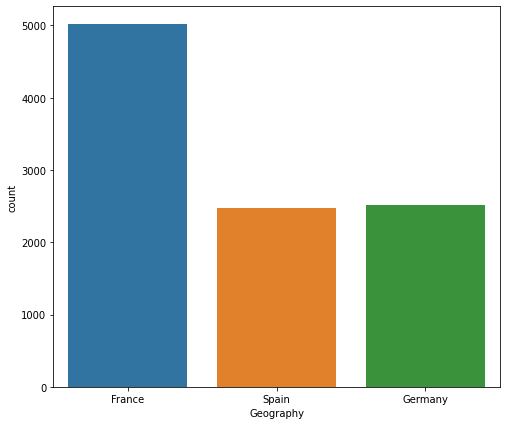

In [12]:
plt.figure(figsize=(8,7))
sns.countplot(x='Geography', data=df)
plt.show()

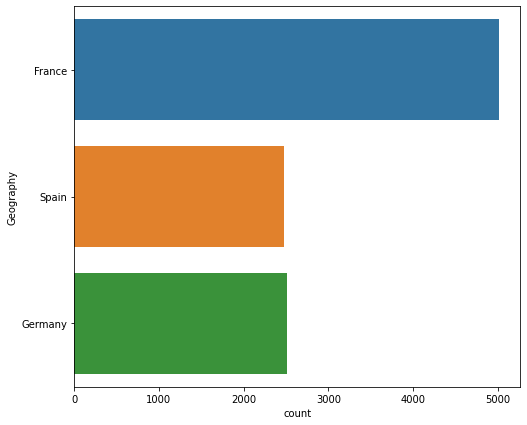

In [13]:
plt.figure(figsize=(8,7))
sns.countplot(y='Geography', data=df)
plt.show()

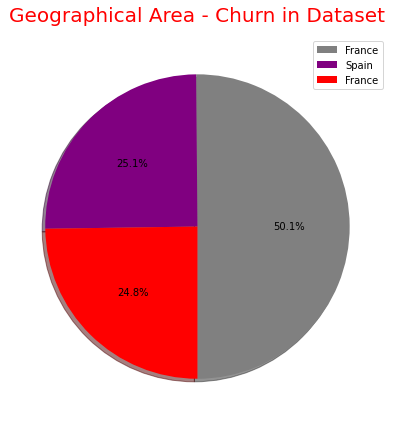

In [14]:
counts = df['Geography'].value_counts()
labels = df['Geography']
colors = ["grey", "purple", "red"]


plt.figure(figsize=(8,7))
plt.pie(x=counts,colors=colors,autopct="%1.1f%%",shadow=True,startangle=270)
plt.legend(labels)
plt.title(label="Geographical Area - Churn in Dataset", color="red", fontsize=20,pad=15)
plt.show()

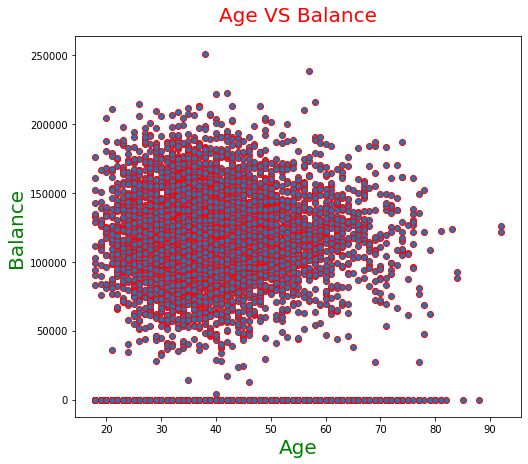

In [15]:
# Age vs Blance

plt.figure(figsize=(8,7))
plt.scatter(x='Age',y='Balance',edgecolors='Red',data=df)
plt.title(label="Age VS Balance", color="red", fontsize=20,pad=15)
plt.xlabel(xlabel="Age", color="green", fontsize=20)
plt.ylabel(ylabel="Balance",color="green", fontsize=20)
plt.show()

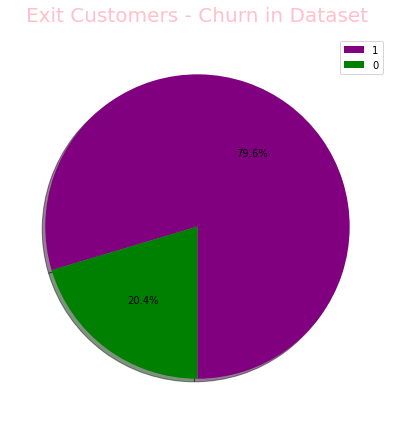

In [16]:
counts2 = df['Exited'].value_counts()
labels2 = df['Exited']
colors2 = ["purple", "green"]


plt.figure(figsize=(8,7))
plt.pie(x=counts2,colors=colors2,autopct="%1.1f%%",shadow=True,startangle=270)
plt.legend(labels2)
plt.title(label="Exit Customers - Churn in Dataset", color="pink", fontsize=20,pad=15)
plt.show()

In [17]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
# Drop unnecessary columns

df.drop(columns=["RowNumber","CustomerId", "Surname"],inplace=True)

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
# Check the shape
df.shape

(10000, 11)

In [21]:
df = pd.get_dummies(data=df,columns=["Geography", "Gender"],drop_first=True)

In [22]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [23]:
# Split the dataset into X and y
X = df.drop(labels="Exited", axis="columns")

y = df['Exited'].values

In [24]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [25]:
# Target
y

array([1, 0, 1, ..., 1, 1, 0])

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [27]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,1,0,1
5140,626,29,4,105767.28,2,0,0,41104.82,0,0,0
2568,612,47,6,130024.87,1,1,1,45750.21,1,0,0
3671,646,52,6,111739.40,2,0,1,68367.18,1,0,0
7427,714,33,8,122017.19,1,0,0,162515.17,0,1,1


In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [29]:
# Apply scaling

scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X=X_train)
X_test_scaler = scaler.transform(X=X_test)

In [30]:
X_train_scaler

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [31]:
X_train_scaler.shape

(8000, 11)

In [32]:
X_test_scaler.shape

(2000, 11)

## Let's create our ANN Model

In [33]:
model = Sequential()

model.add(layer=Dense(units=11, activation="sigmoid", input_dim=11))
model.add(layer=Dense(units=22, activation="tanh"))
# model.add(layer=Dense(units=22, activation="relu"))
model.add(layer=Dense(units=1, activation="sigmoid"))

2022-09-04 11:20:53.606917: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


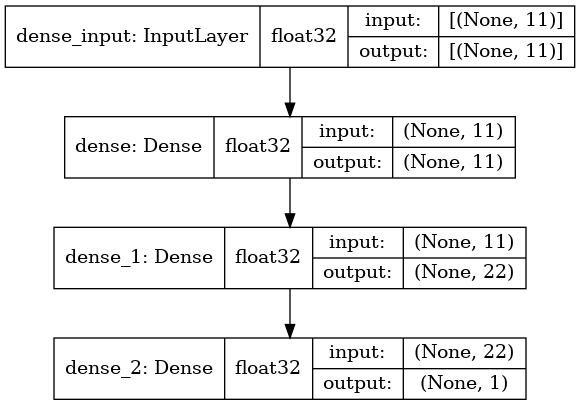

In [34]:
plot_model(model=model, show_shapes=True, show_dtype=True)

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 22)                264       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 23        
Total params: 419
Trainable params: 419
Non-trainable params: 0
_________________________________________________________________


In [36]:
# "hinge" loss used basically in logistics regression

# model.compile(optimizer="sgd", loss="hinge", metrics=['accuracy'])

# model.compile(loss='hinge',optimizer='sgd',metrics=['accuracy','Precision','Poisson'])

model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=['accuracy'])

In [37]:
history = model.fit(x=X_train_scaler, y=y_train, epochs=100, verbose=1, validation_split=0.2)

2022-09-04 11:20:55.145326: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4836 - accuracy: 0.7972 - val_loss: 0.4563 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.8075 - val_loss: 0.4360 - val_accuracy: 0.8087
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.8111 - val_loss: 0.4321 - val_accuracy: 0.8069
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.8130 - val_loss: 0.4307 - val_accuracy: 0.8050
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8125 - val_loss: 0.4303 - val_accuracy: 0.8094
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8152 - val_loss: 0.4294 - val_accuracy: 0.8156
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.8142 - val_loss: 0.4271 - val_accuracy: 0.8106

In [38]:
# print the weights

model.layers[0].get_weights()

[array([[-0.69582283,  0.0588897 , -0.23900044, -0.5130238 , -0.19235505,
          0.5798768 , -0.2512324 ,  0.06181419,  0.09549879,  0.14005737,
         -0.11735719],
        [-0.08473849,  0.5980391 , -0.48530167,  0.77464676,  0.29915652,
         -0.56698996, -0.04010043, -1.6221746 , -0.3252063 , -1.7360097 ,
          1.7869735 ],
        [-0.09212466,  0.12283023, -0.19030993,  0.2245074 ,  0.10892733,
          0.41228497, -0.36865488,  0.10716504, -0.246156  ,  0.12971681,
          0.18162762],
        [-0.45214424,  0.49518478,  0.33704016, -0.30317768, -0.1268696 ,
          0.24069329,  0.46969458, -0.35863596,  0.20513336,  0.12517354,
         -0.16013698],
        [-0.50631785,  1.992722  ,  0.94413227, -1.3565878 , -0.18842474,
          0.83389544,  0.39367855, -0.5571374 , -0.80240226, -0.15193307,
         -0.14066528],
        [-0.3572107 ,  0.01581055,  0.05282212,  0.3882273 ,  0.5589375 ,
          0.118762  , -0.21516868,  0.49787065,  0.15074022,  0.2329760

In [39]:
model.layers[1].get_weights()

[array([[-0.21748145,  0.356953  ,  0.12251067,  0.43986514, -0.27927658,
         -0.37739256, -0.23106785, -0.30227718,  0.27009046, -0.17295806,
          0.12459736,  0.34424907, -0.15956683,  0.22473186, -0.21904978,
          0.10840154, -0.15185232, -0.22404166, -0.2826511 , -0.20510449,
         -0.16207957,  0.16601673],
        [ 1.0561771 , -0.7912645 ,  0.5349694 ,  0.76227295, -0.700391  ,
         -0.72877043,  0.2674382 , -0.3466447 , -1.4929223 , -0.8250191 ,
         -0.52228963,  0.41922796, -0.939667  , -0.24987765,  0.78659093,
         -0.03015314,  0.5421644 , -0.5850246 , -0.71797276,  0.20576347,
         -0.39809367,  0.36568817],
        [ 0.2937906 , -0.8285672 , -0.67863876, -0.30589026,  0.78016645,
          0.8972389 , -0.3963049 ,  0.5342032 , -0.9451151 ,  0.20912588,
          0.5672533 , -0.01862898, -0.36439204,  0.4403965 , -0.50499994,
          0.82271856, -0.49271226,  0.6808029 ,  0.9507726 ,  0.444213  ,
          0.5915973 , -0.83738726],
    

In [40]:
model.layers[2].get_weights()

[array([[-0.41141042],
        [ 0.2897412 ],
        [-1.386094  ],
        [-0.54018134],
        [ 1.3705122 ],
        [ 1.2493993 ],
        [-0.4521546 ],
        [ 0.600398  ],
        [ 0.6516925 ],
        [ 0.91428113],
        [ 0.88840497],
        [-0.4416006 ],
        [ 0.5614666 ],
        [ 0.2470372 ],
        [-0.8383526 ],
        [ 0.8533026 ],
        [-0.5056986 ],
        [ 1.1304314 ],
        [ 1.2651639 ],
        [ 0.36469752],
        [ 0.52282715],
        [-0.7404437 ]], dtype=float32),
 array([0.11533259], dtype=float32)]

In [41]:
history.history

{'loss': [0.4836452007293701,
  0.4399714767932892,
  0.428854376077652,
  0.42653629183769226,
  0.4251037836074829,
  0.42341840267181396,
  0.42283016443252563,
  0.42093944549560547,
  0.41912952065467834,
  0.4168204069137573,
  0.41497528553009033,
  0.41275474429130554,
  0.4097597002983093,
  0.40719181299209595,
  0.4018489420413971,
  0.39727330207824707,
  0.39159029722213745,
  0.385290265083313,
  0.3789222836494446,
  0.3727717995643616,
  0.36641162633895874,
  0.3620833158493042,
  0.35851359367370605,
  0.3540315330028534,
  0.35051649808883667,
  0.3478596806526184,
  0.34635093808174133,
  0.34513378143310547,
  0.34388408064842224,
  0.34289345145225525,
  0.3425949811935425,
  0.3413742482662201,
  0.3407934606075287,
  0.339705228805542,
  0.339924156665802,
  0.3392588496208191,
  0.3390200436115265,
  0.338232159614563,
  0.33791497349739075,
  0.33722880482673645,
  0.3366585969924927,
  0.3375818729400635,
  0.3365621566772461,
  0.3364875912666321,
  0.335614

In [42]:
from matplotlib import style

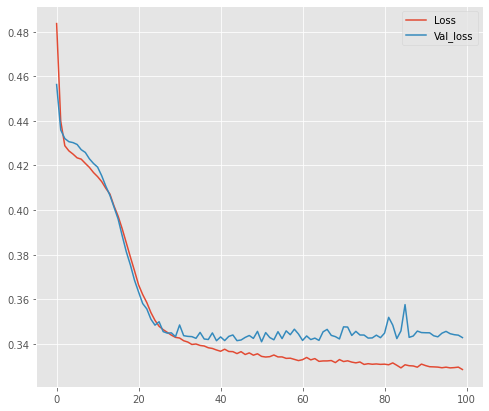

In [43]:
style.use("ggplot")
plt.figure(figsize=(8,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val_loss'])
plt.show()

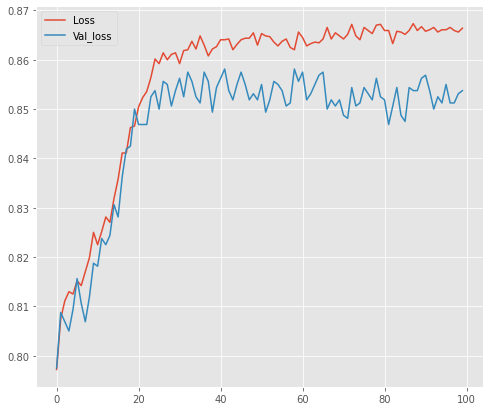

In [44]:
style.use("ggplot")
plt.figure(figsize=(8,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Loss', 'Val_loss'])
plt.show()